In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] # 显示中文
plt.rcParams['axes.unicode_minus'] = False # 显示负号

In [4]:
df=pd.read_csv(
    r'E:\Projects\OneDrive - somebottle\文档Documents\大数据分析Spark\期末大作业\analyses\aqi_calc_res\part-00000-7bb0d41b-8a82-4389-bc0e-bd06172e10d6-c000.csv'
)

In [5]:
df.head(2)

,监测时间,SO2,NO2,PM10,PM2_5,O3,CO,SO2_IAQI,NO2_IAQI,CO_IAQI,O3_IAQI,PM2_5_IAQI,PM10_IAQI,AQI,AQI_Category
0,2019-04-16,5,56,36,31,103,0.8,5,70,20,53,44,36,70,良
1,2019-04-17,9,63,67,53,206,1.1,9,79,28,142,73,59,142,轻度污染


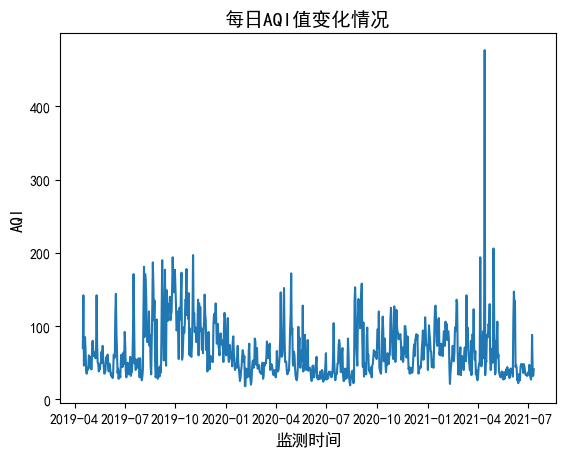

In [51]:
# 绘制AQI变化折线图
time_col=pd.to_datetime(df['监测时间']) # 把时间列转换为日期类型
plt.plot(time_col, df['AQI'])
# 图的描述
plt.title('每日AQI值变化情况', fontsize=14)
plt.xlabel('监测时间', fontsize=12)
plt.ylabel('AQI', fontsize=12)
plt.show()

In [19]:
df.groupby('AQI_Category')['监测时间'].count()

(6,)

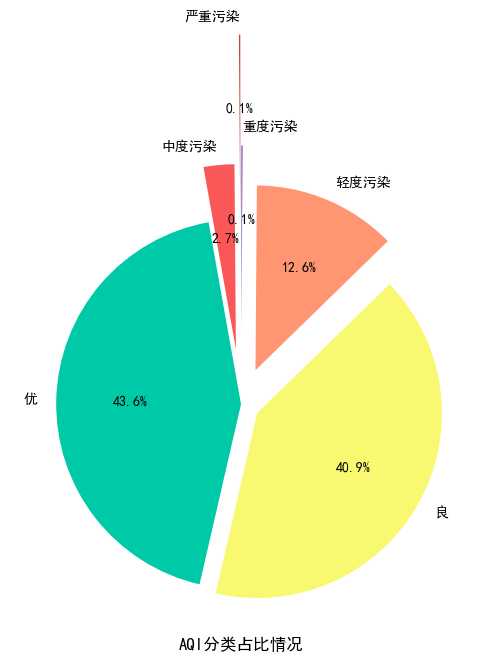

In [50]:
# 统计各AQI分类下的行数
category_cnt=df.groupby('AQI_Category')['监测时间'].count()
explode=[1,0.3,0,0.1,0.2,0.4]
fig, ax = plt.subplots(figsize=(6,6))
colors = ['#C34A36','#FA5858','#00C9A7','#F9F871','#FF9671','#845EC2']
ax.pie(category_cnt, explode=explode,colors=colors, labels=category_cnt.index, autopct='%1.1f%%', startangle=90)
ax.set_title('AQI分类占比情况', fontsize=12,y=-0.05)
plt.show()